In [15]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
#q2

In [2]:
#part1-> (A^T A)^-1 A^T Y

In [79]:
def least_squared_approach(x, y):
    r = x.shape[0]
    z = np.zeros((r,1), dtype=np.int64)
    z += 1
    m = np.append(x, z, axis=1)
    A = np.asmatrix(m)
    At = A.transpose()
    inver = inv(np.matmul(At , A) )
    Y = np.asmatrix(y).transpose()
    return np.matmul(np.matmul(inver, At), Y)


In [80]:
x = [[3,3], [3,0], [2,1], [0,2], [-1, 1], [0,0], [-1,-1], [1,0]]
x = np.asarray(x)
y = [1,1,1,1,-1,-1,-1,-1]
y = np.asarray(y)
lsa = least_squared_approach(x,y)

In [81]:
def fisher_lda(x, y):
    class1 = []
    class2 = []
    for a in zip(x,y):
        if a[1]==1:
            class1.append(a[0])
        else:
            class2.append(a[0])
    mat1 = np.asmatrix(class1)
    mat2 = np.asmatrix(class2)
    u1 = mat1.mean(0)
    u2 = mat2.mean(0)
    reg1 = mat1 - u1
    reg2 = mat2 - u2
    sb2 = np.matmul(reg1.transpose(), reg1) + np.matmul(reg2.transpose(), reg2)
    u = (u1-u2).transpose()
    return np.matmul(sb2,u)

In [82]:
fisher = fisher_lda(x,y)

In [83]:
import matplotlib.pyplot as plt

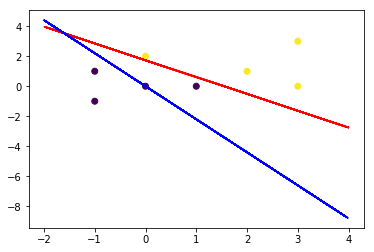

In [84]:
fig, ax = plt.subplots()
plt.scatter(x[:,0],x[:,1],c=y[:])
plot_graph(lsa.tolist(),ax, "red")
plot_graph(fisher.tolist(), ax, "blue")
plt.show()

In [85]:
def plot_graph(vect, ax, color):
    n = 600
    if len(vect)<3:
        vect.append(0)
    x = np.random.randn(n) % 6 -2
    y = np.random.randn(n) % 6 -2
    ax.plot(x, -1 * ( vect[0] * x +  vect[2])/vect[1], color=color)

In [87]:
#part 4
x = [[3,3], [3,0], [2,1], [0,1.5], [-1, 1], [0,0], [-1,-1], [1,0]]
x = np.asarray(x)
y = [1,1,1,1,-1,-1,-1,-1]
y = np.asarray(y)
lsa = least_squared_approach(x,y)
fisher = fisher_lda(x,y)

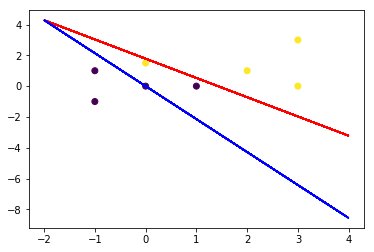

In [88]:
fig, ax = plt.subplots()
plt.scatter(x[:,0],x[:,1],c=y[:])
plot_graph(lsa.tolist(),ax, "red")
plot_graph(fisher.tolist(), ax, "blue")
plt.show()